In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
# this will set the notebook to display all the executed statement value on the screen
#print multiple statement in single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
# load dataset
data = pd.read_csv('paribas.csv', nrows=50000)
data.shape

(50000, 133)

In [4]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [5]:
data =data.dropna(how='any')

In [6]:
for col in data.columns:
    if data[col].dtype == "object":
        data[col] = pd.Categorical(data[col]).codes

# Split the data into train and test set

In [7]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((5467, 131), (2344, 131))

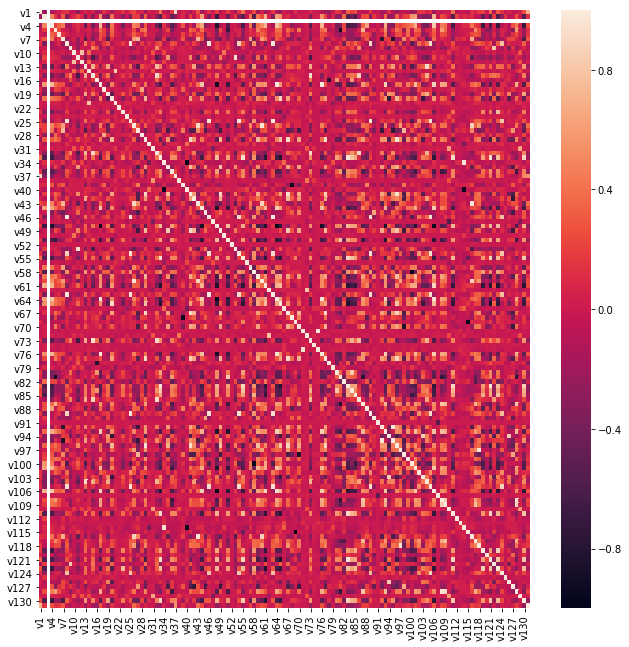

In [8]:
# visualise correlated features
# correlation of all features (for all possible feature combinations)
# and then visualise the correlation matrix using seaborn

corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [9]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

In [10]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
X_train.shape
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

(5467, 131)

54

<h2> 54 features are highly correlated with other features in the training set. </h2>

<h4>Remove the correlated features</h4>

In [13]:
corr_features

{'v100',
 'v101',
 'v103',
 'v104',
 'v105',
 'v106',
 'v109',
 'v111',
 'v114',
 'v115',
 'v116',
 'v118',
 'v121',
 'v122',
 'v123',
 'v124',
 'v126',
 'v128',
 'v130',
 'v21',
 'v25',
 'v32',
 'v37',
 'v40',
 'v41',
 'v43',
 'v46',
 'v48',
 'v49',
 'v53',
 'v54',
 'v55',
 'v60',
 'v61',
 'v63',
 'v64',
 'v65',
 'v67',
 'v68',
 'v73',
 'v75',
 'v76',
 'v77',
 'v78',
 'v81',
 'v83',
 'v84',
 'v86',
 'v87',
 'v89',
 'v93',
 'v95',
 'v96',
 'v98'}

In [12]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((5467, 77), (2344, 77))

# After removing the features using correlation from 131 to 77